<a href="https://colab.research.google.com/github/juliosdutra/Controle_de_Processos_UFES/blob/main/5.Closed-Loop/Substitui%C3%A7%C3%A3o_direta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $\color{green}{\text{Substituição direta}}$

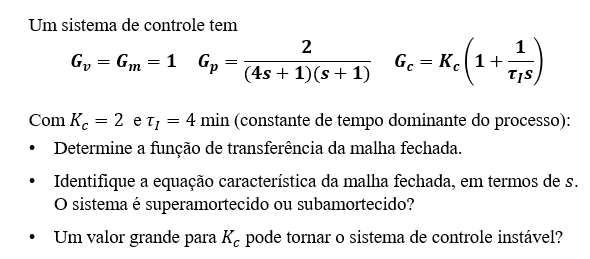

<font color='blue'> Vamos resolver simbolicamente... </font>

In [59]:
import sympy as sp
import numpy as np

s = sp.symbols('s')

# Parametros do controlador
Kc = 2
tauI = 4

# Funções de tranferência
Gv = Gm = 1
Gp = 2/((4*s+1)*(s+1))
Gc = Kc*(1+1/(tauI*s))

* Função de transferência da malha fechada <font color='red'>(que de fato é de segunda ordem)</font>. Ao deixar de substituir $\tau_I = 4$ na resolução em sala de aula, não aconteceu um cancelamento esperado nos monômios.

In [ ]:
Gol = Gc*Gv*Gp*Gm
G = (Gc*Gv*Gp)/(1+Gol)
G.expand().simplify()

1/(s**2 + s + 1)

* O sistema é superamortecido ou subamortecido?

Comparando com um sistema de segunda ordem:

$$ \frac{K}{\tau^2 s^2 + 2\xi\tau s+1} = \frac{1}{s^2 + s+1} $$

tem-se o ganho estacionário $K=1$, o período natural $\tau = 1$ e o termo $2\xi \tau = 1$, de modo que o fator de amortecimento é $\xi = 0.5$.

**Como $0<\xi< 1$, o sistema exibe resposta subamortecida.**


* Um valor grande para $K_c$ pode tornar o sistema de controle instável?



<font color='blue'>Vamos aplicar o Método da Substituição Direta!</font>

Passo 1 - escrever a equação característica da malha fechada:

$$1+G_{OL}=1+G_c G_v G_p G_m = 0$$

> Bloco com recuo



In [30]:
Kc = sp.symbols('Kc')
tauI = 4
Gc = Kc*(1+1/(tauI*s))
Gol = Gc*Gv*Gp*Gm
(1 + Gol).expand().simplify()

(Kc/2 + s**2 + s)/(s*(s + 1))

Desse modo, $1+G_{OL}=0$ leva à expressão:
$$s^2 + s + \frac{Kc}{2}=0$$

Passo 2 - fazer $s=\omega i$:

In [31]:
from sympy import I
w = sp.symbols('\omega')
eq = s**2+s+Kc/2
eq.subs({'s':w*I})

Kc/2 - \omega**2 + I*\omega

Passo 3 - separar a parte real da parte imaginária e igualar cada uma zero:
$$ -4\omega^2 + 1 + 2K_c = 0$$
$$ 5 \omega = 0 $$

Resolvendo o sistema, a solução é:

$\omega = 0$ (solução trivial)

$K_c = -1/2$

**Análise**: Para conferir estabilidade à malha fechada, deve-se ter um ganho positivo na malha aberta
$$K_{OL} = K_c K_v K_p K_m >0$$

Nesta questão, este o valor é dado por:
$$ K_{OL}= 2K_c $$
de modo que $K_c$ também deve ser positivo para assegurar estabilidade.

Pode-se ver que a solução via "Método da Substituição Direta" nos leva a um valor de ganho último ou marginal ($K_{c,m} = -1/2$) inviável para este processo. Significa dizer que não existe um valor deste parâmetro em sua faixa esperada para causa instabilidade na malha fechada. Se fosse usado o Método de Bode, veríamos também que não existe uma frequência crítica, tal que $\varphi(\omega_c)=-\pi$, para ser possível avaliar a razão de amplitude, $RA(\omega)$, nesta frequência. Essa conclusão seria justamente o contrário se estivesse presente um termo de tempo-morto, $e^{-\theta s}$, na função de transferência.

Dessa forma, usando a diretriz geral, o sistema desta questão será estável em malha fechada para qualquer valor $K_c > 0$ (**isto é, um valor grande para $K_c$ não torna o sistema de controle instável**). No entanto, valores elevados deste parâmetro causam oscilações excessivas na resposta da variável controlada e danos severos na variável manipulada.


<font color='blue'>Vamos demostrar que o sistema será estável para qualquer valor de $K_c>0$ ...</font>

In [28]:
! pip install -qq control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 6.9 MB/s eta 0:00:00


Kc=0.1, polos: [-0.9472136+0.j -0.0527864+0.j]
Kc=0.5, polos: [-0.49999999+0.j -0.50000001+0.j]
Kc=5.0, polos: [-0.5+1.5j -0.5-1.5j]
Kc=10.0, polos: [-0.5+2.17944947j -0.5-2.17944947j]


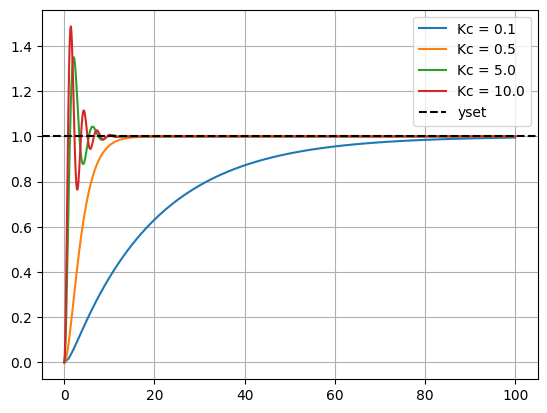

In [82]:
# Simulação da malha fechada

import control as ct
import matplotlib.pyplot as plt

s = ct.tf('s')
tauI = 4
Gp = 2/((4*s+1)*(s+1))

# Arbitrando valores positivos para Kc
sintonia_Kc = [0.1, 0.5, 5.0, 10.0] # teste algum valor de Kc<0!

for Kc in sintonia_Kc:

  # Atualizando Kc no PI
  Gc = Kc*(1+1/(tauI*s))

  # Malha aberta
  Gol = Gc*Gv*Gp*Gm

  # Malha fechada
  G = ct.minreal( (Gc*Gv*Gp)/(1+Gol), verbose=False)

  # Polos da malha fechada
  print(f'Kc={Kc}, polos:', G.poles())

  # Simulação da malha fechada
  t, y = ct.step_response(G, T=100)
  plt.plot(t,y,label = f'Kc = {Kc}')

plt.axhline(y=1, color = 'k', linestyle='--', label = 'yset')
plt.legend()
plt.grid()